<a href="https://colab.research.google.com/github/vikram-available/Trading-algo/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/gp_forex/EURUSD1__1.0.csv', delimiter='\t')
data.head()


,2024-05-14 11:21,1.07983,1.07983.1,1.07975,1.07980,42
0,2024-05-14 11:22,1.07981,1.07981,1.07980,1.07980,6
1,2024-05-14 11:23,1.07981,1.07981,1.07969,1.07970,36
2,2024-05-14 11:24,1.07969,1.07972,1.07965,1.07972,45
3,2024-05-14 11:25,1.07973,1.07980,1.07973,1.07979,27
4,2024-05-14 11:26,1.07977,1.07980,1.07976,1.07977,40


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df=  pd.read_csv('/content/drive/MyDrive/gp_forex/EURUSD1__1.0.csv', delimiter='\t', header=None)
df.columns= ['Datetime', 'open', 'high', 'low', 'close', 'volume']
df.set_index('Datetime', inplace=True)
#df=df.iloc[-80000:]
df.index = pd.to_datetime(df.index, format='%Y-%m-%d %H:%M')

df.head()



,open,high,low,close,volume
Datetime,,,,,
2024-05-14 11:21:00,1.07983,1.07983,1.07975,1.07980,42
2024-05-14 11:22:00,1.07981,1.07981,1.07980,1.07980,6
2024-05-14 11:23:00,1.07981,1.07981,1.07969,1.07970,36
2024-05-14 11:24:00,1.07969,1.07972,1.07965,1.07972,45
2024-05-14 11:25:00,1.07973,1.07980,1.07973,1.07979,27


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1LVvrbcvZbxx6zXfwv-5JWTyjjV8UptdQVLgPAPsTa84#gid=0


In [ ]:
df.tail()

,open,high,low,close,volume
Datetime,,,,,
2024-08-20 10:55:00,1.10808,1.10813,1.10806,1.10806,54
2024-08-20 10:56:00,1.10808,1.10808,1.10801,1.10801,238
2024-08-20 10:57:00,1.10801,1.10804,1.10798,1.10801,227
2024-08-20 10:58:00,1.10800,1.10824,1.10798,1.10822,508
2024-08-20 10:59:00,1.10823,1.10827,1.10814,1.10819,353


from matplotlib import pyplot as plt
_df_0['open'].plot(kind='hist', bins=20, title='open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['high'].plot(kind='hist', bins=20, title='high')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['low'].plot(kind='hist', bins=20, title='low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='open', y='high', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='high', y='low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='low', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='close', y='volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['open'].plot(kind='line', figsize=(8, 4), title='open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['high'].plot(kind='line', figsize=(8, 4), title='high')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
!pip install mplfinance
import mplfinance as mpf



In [ ]:
pip install pandas_ta


In [ ]:
import pandas_ta as ta

df['SMA_20'] = ta.sma(df['close'], length=20)  # Simple Moving Average
df['RSI'] = ta.rsi(df['close'], length=14)  # Relative Strength Index
df['MACD'] = ta.macd(df['close'], fast=12, slow=26, signal=9)['MACD_12_26_9']  # MACD Line
df['MACD_Signal'] = ta.macd(df['close'], fast=12, slow=26, signal=9)['MACDs_12_26_9']  # MACD Signal Line
df['Bollinger_Upper'] = ta.bbands(df['close'], length=20)['BBU_20_2.0']  # Bollinger Bands Upper Band
df['Bollinger_Lower'] = ta.bbands(df['close'], length=20)['BBL_20_2.0']

In [ ]:
df.dropna(inplace=True)
df

,open,high,low,close,volume,SMA_20,RSI,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower
Datetime,,,,,,,,,,,
2024-05-14 11:54:00,1.07947,1.07948,1.07939,1.07942,72,1.079671,25.296101,-0.000082,-0.000045,1.079940,1.079402
2024-05-14 11:55:00,1.07943,1.07951,1.07941,1.07949,43,1.079653,34.872673,-0.000082,-0.000052,1.079920,1.079386
2024-05-14 11:56:00,1.07951,1.07955,1.07951,1.07953,94,1.079638,39.634791,-0.000078,-0.000057,1.079899,1.079378
2024-05-14 11:57:00,1.07952,1.07954,1.07938,1.07938,88,1.079622,30.599098,-0.000086,-0.000063,1.079903,1.079341
2024-05-14 11:58:00,1.07938,1.07938,1.07927,1.07932,150,1.079601,27.862852,-0.000096,-0.000070,1.079905,1.079297
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20 10:55:00,1.10808,1.10813,1.10806,1.10806,54,1.107935,57.777393,0.000068,0.000062,1.108219,1.107652
2024-08-20 10:56:00,1.10808,1.10808,1.10801,1.10801,238,1.107946,54.091996,0.000062,0.000062,1.108224,1.107668
2024-08-20 10:57:00,1.10801,1.10804,1.10798,1.10801,227,1.107959,54.091996,0.000057,0.000061,1.108223,1.107695


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Assuming your dataset has 'Close' prices and datetime as index
data = df[['close','SMA_20', 'RSI','MACD_Signal']].values

scaler = MinMaxScaler(feature_range=(0, 1))  # Typically normalized between 0 and 1
scaled_data = scaler.fit_transform(data)

# Define sequence length for LSTM
sequence_length = 60

# Prepare the input and output sequences
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Target is the 'close' price

X = np.array(X)
y = np.array(y).reshape(-1, 1)  # Ensures that y is a 1D array with the correct number of samples

# Reshape X to be 3D [samples, time steps, features] for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=72, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
model.fit(X_train_sample, y_train_sample, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1749/1749 [==============================] - 18s 9ms/step - loss: 0.0012 - val_loss: 3.6451e-05
Epoch 2/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.5536e-04 - val_loss: 7.4267e-05
Epoch 3/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.4635e-04 - val_loss: 7.6526e-05
Epoch 4/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.5682e-04 - val_loss: 2.5630e-05
Epoch 5/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.4697e-04 - val_loss: 4.7495e-05
Epoch 6/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.3753e-04 - val_loss: 2.2007e-05
Epoch 7/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.2428e-04 - val_loss: 9.8845e-05
Epoch 8/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.1441e-04 - val_loss: 3.5177e-05
Epoch 9/50
1749/1749 [==============================] - 14s 8ms/step - loss: 3.1482e-04 - val_loss: 5.8274e-05
Epoch

In [30]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape y_train and y_test to be 2D for concatenation
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_predict_extended = np.concatenate([train_predict, np.zeros((train_predict.shape[0], X.shape[2] - 1))], axis=1)
test_predict_extended = np.concatenate([test_predict, np.zeros((test_predict.shape[0], X.shape[2] - 1))], axis=1)
y_train_extended = np.concatenate([y_train, np.zeros((y_train.shape[0], X.shape[2] - 1))], axis=1)
y_test_extended = np.concatenate([y_test, np.zeros((y_test.shape[0], X.shape[2] - 1))], axis=1)

# Invert predictions and true values back to original scale
train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]  # Only take the 'close' column
y_train = scaler.inverse_transform(y_train_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]


# Evaluate the model (e.g., RMSE)
train_rmse = np.sqrt(np.mean((train_predict - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test) ** 2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')




625/625 [==============================] - 2s 3ms/step
Train RMSE: 0.00024499145913165854
Test RMSE: 0.0002412099897526839


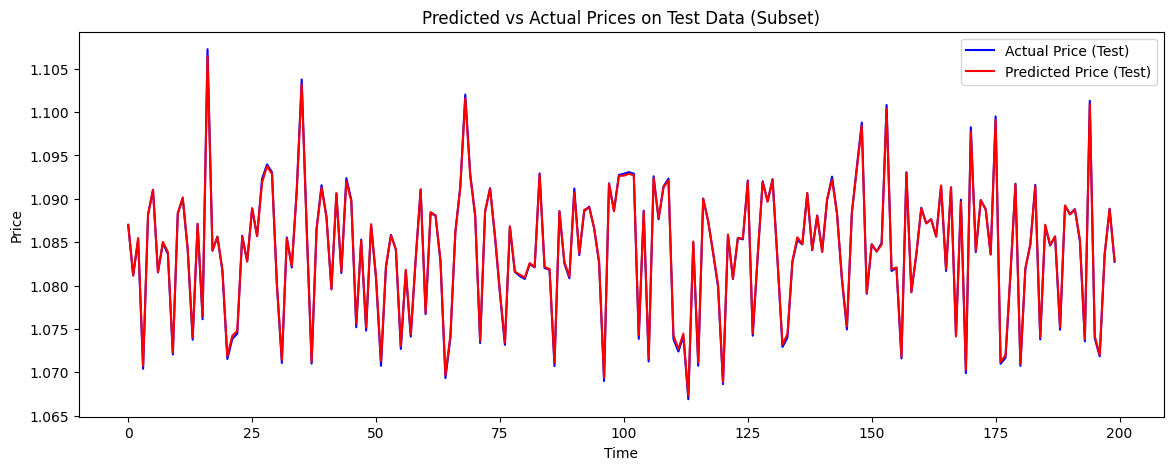

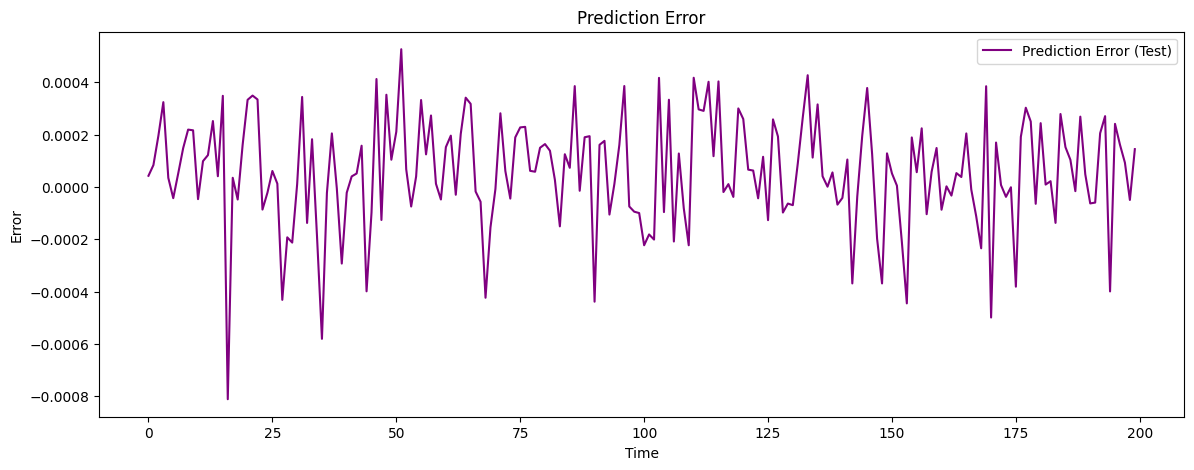

In [31]:
# Correctly plot a smaller subset for better visualization
subset_size = 200  # Or any number that fits your desired visualization
plt.figure(figsize=(14, 5))
plt.plot(y_test[:subset_size], color='blue', label='Actual Price (Test)')
plt.plot(test_predict[:subset_size], color='red', label='Predicted Price (Test)')
plt.title('Predicted vs Actual Prices on Test Data (Subset)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Additional plot: Prediction Error on the same subset
plt.figure(figsize=(14, 5))
plt.plot((test_predict[:subset_size] - y_test[:subset_size]), color='purple', label='Prediction Error (Test)')
plt.title('Prediction Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()

In [32]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape y_train and y_test to be 2D for concatenation
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_predict_extended = np.concatenate([train_predict, np.zeros((train_predict.shape[0], X.shape[2] - 1))], axis=1)
test_predict_extended = np.concatenate([test_predict, np.zeros((test_predict.shape[0], X.shape[2] - 1))], axis=1)
y_train_extended = np.concatenate([y_train, np.zeros((y_train.shape[0], X.shape[2] - 1))], axis=1)
y_test_extended = np.concatenate([y_test, np.zeros((y_test.shape[0], X.shape[2] - 1))], axis=1)

# Invert predictions and true values back to original scale
train_predict = scaler.inverse_transform(train_predict_extended)[:, 0]  # Only take the 'close' column
y_train = scaler.inverse_transform(y_train_extended)[:, 0]
test_predict = scaler.inverse_transform(test_predict_extended)[:, 0]
y_test = scaler.inverse_transform(y_test_extended)[:, 0]


# Evaluate the model (e.g., RMSE)
train_rmse = np.sqrt(np.mean((train_predict - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test) ** 2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')




625/625 [==============================] - 2s 3ms/step
Train RMSE: 0.029210709084709876
Test RMSE: 0.029304268962344174


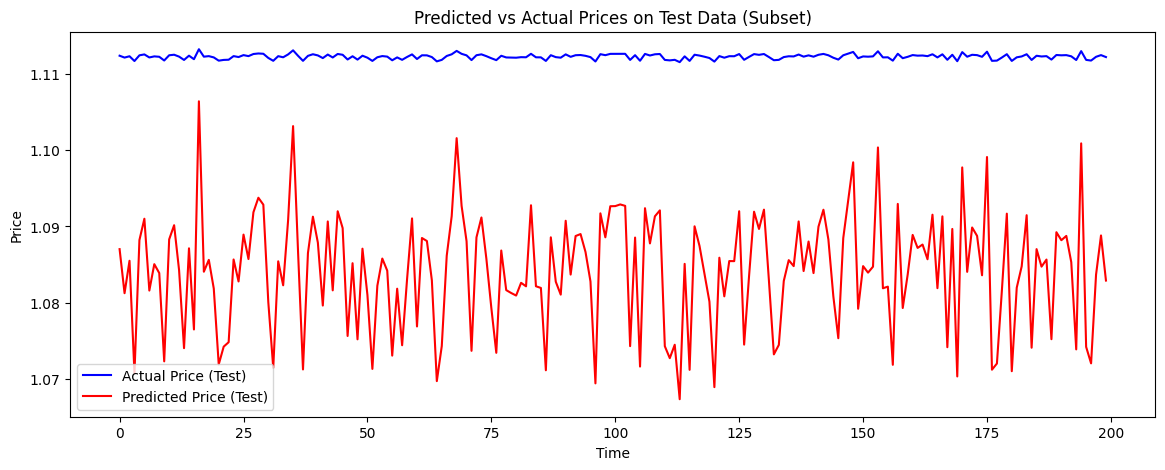

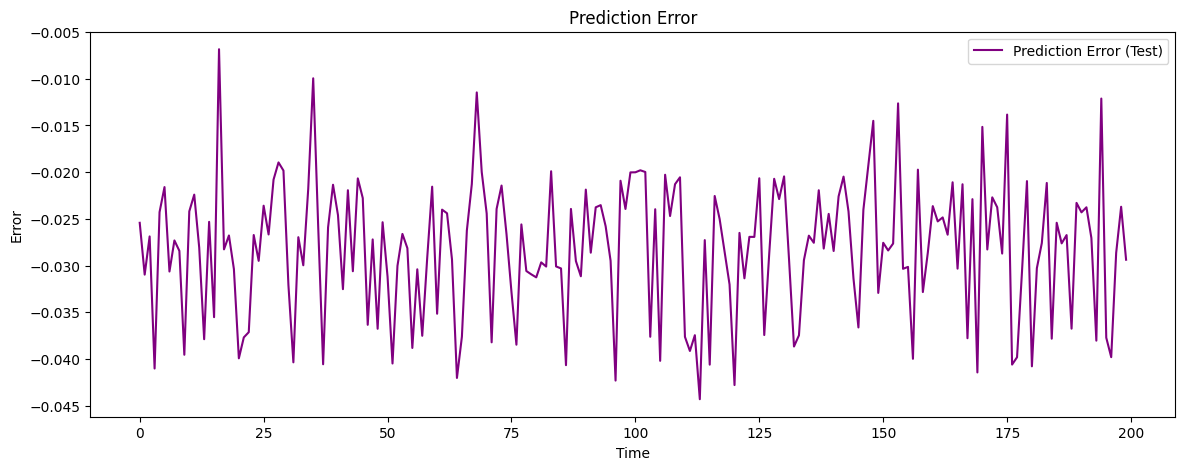

In [33]:
# Correctly plot a smaller subset for better visualization
subset_size = 200  # Or any number that fits your desired visualization
plt.figure(figsize=(14, 5))
plt.plot(y_test[:subset_size], color='blue', label='Actual Price (Test)')
plt.plot(test_predict[:subset_size], color='red', label='Predicted Price (Test)')
plt.title('Predicted vs Actual Prices on Test Data (Subset)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Additional plot: Prediction Error on the same subset
plt.figure(figsize=(14, 5))
plt.plot((test_predict[:subset_size] - y_test[:subset_size]), color='purple', label='Prediction Error (Test)')
plt.title('Prediction Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()